In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

In [10]:
data = pd.read_csv("PopulationByAgeSex-Copy1.csv", index_col="Time", parse_dates=True)

In [11]:
data

,Id,LocID,Location,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,...,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
Time,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1,4,Afghanistan,630.044,661.578,1291.622,516.206,487.335,1003.541,461.378,...,0.004,0.003,0.007,0.000,0.000,0.000,4099.243,3652.874,7752.117,1
1951-01-01,2,4,Afghanistan,641.199,673.293,1314.492,525.302,502.402,1027.704,465.611,...,0.007,0.005,0.012,0.000,0.000,0.000,4134.756,3705.395,7840.151,1
1952-01-01,3,4,Afghanistan,650.825,669.274,1320.099,533.097,521.672,1054.769,471.928,...,0.012,0.009,0.021,0.000,0.000,0.000,4174.450,3761.546,7935.996,1
1953-01-01,4,4,Afghanistan,659.896,663.606,1323.502,538.351,541.216,1079.567,480.448,...,0.015,0.013,0.028,0.000,0.000,0.000,4218.336,3821.348,8039.684,1
1954-01-01,5,4,Afghanistan,670.694,663.295,1333.989,540.820,557.196,1098.016,489.780,...,0.014,0.011,0.025,0.000,0.000,0.000,4266.484,3884.832,8151.316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096-01-01,66889,716,Zimbabwe,953.505,939.918,1893.423,968.045,956.123,1924.168,992.221,...,3.108,11.248,14.356,0.142,0.883,1.025,15008.463,15932.316,30940.779,1
2097-01-01,66890,716,Zimbabwe,950.059,936.463,1886.522,963.764,951.798,1915.562,986.112,...,4.189,13.881,18.070,0.154,0.947,1.101,15008.822,15943.386,30952.208,1
2098-01-01,66891,716,Zimbabwe,946.047,932.455,1878.502,959.864,947.789,1907.653,980.369,...,5.003,15.945,20.948,0.169,1.022,1.191,15007.570,15952.241,30959.811,1


## let's create our Targets and Features

In [12]:
## Targets
y = data['PopTotal']
y = y.values.reshape(-1,1)

## Features
x = data.drop(['PopTotal', 'Location'], axis =1)

In [13]:
y

array([[ 7752.117],
       [ 7840.151],
       [ 7935.996],
       ...,
       [30959.811],
       [30964.052],
       [30965.421]])

## 

In [14]:
## encodage 
encoder = OrdinalEncoder()

x_encodé = encoder.fit_transform(x)
y_encodé = encoder.fit_transform(y)

In [15]:
## let's create our test and train variables

x_train, x_test, y_train, y_test = train_test_split(x_encodé, y_encodé)

print(f'train :{x_train.shape},{y_train.shape}')
print(f'test :{x_test.shape},{y_test.shape}')

train :(50169, 68),(50169, 1)
test :(16724, 68),(16724, 1)


## let's do standardization and modeling

In [16]:
## we will use pipeline to group our transforms into a single object and benefit from cross-validation
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [17]:
## let's evaluate the model

model.score(x_test, y_test)

0.9999926332670098

In [18]:
prediction = model.predict(x_encodé[0:50])
target = y_encodé[0:50]

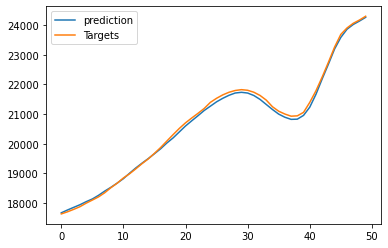

In [19]:
## let's visualize the performance of the model
plt.plot(prediction, label="prediction")
plt.plot(target, label="Targets")
plt.legend()
plt.show()